DataSet and Preprocessing

In [1]:
# Import necessary libraries
from keras.datasets import mnist  # Load MNIST dataset
from keras.utils import to_categorical  # Convert labels to one-hot encoding
from keras.callbacks import EarlyStopping, ModelCheckpoint  # Callbacks for early stopping and model checkpointing
from keras.models import Sequential  # Sequential model
from keras.layers import Dense  # Fully connected layers
from keras.models import load_model  # Load saved model

import matplotlib.pyplot as plt  # For visualization
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

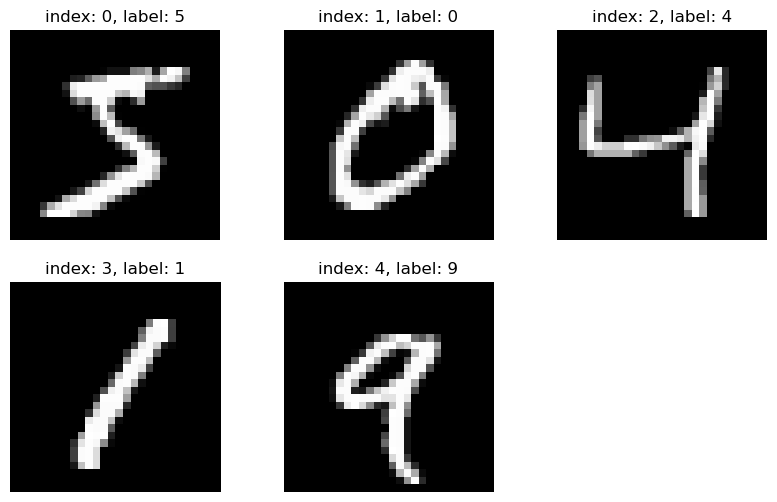

In [3]:
# Visualize the first 5 images from the training set
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"index: {i}, label: {y_train[i]}")
    plt.axis("off")
plt.show()

In [4]:
# Preprocess the data
# Reshape images to 784-dimensional vectors and normalize to [0, 1]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2])).astype("float32") / 255
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2])).astype("float32") / 255

# Convert labels to one-hot encoding (10 classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Build and Compile ANN Model

In [5]:
# Define the model architecture
model = Sequential()

# First layer: 512 neurons, ReLU activation, input shape 28x28=784
model.add(Dense(512, activation="relu", input_shape=(28 * 28,)))

# Second layer: 256 neurons, Tanh activation
model.add(Dense(256, activation="tanh"))

# Output layer: 10 neurons (one for each class), Softmax activation
model.add(Dense(10, activation="softmax"))

# Print model summary
model.summary()

# Compile the model
# Optimizer: Adam, Loss: Categorical Crossentropy, Metric: Accuracy
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Callback'lerin Tanımlanması ve ANN Eğitilmesi

In [6]:
# Define callbacks
# EarlyStopping: Stop training if validation loss does not improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ModelCheckpoint: Save the best model based on validation loss
checkpoint = ModelCheckpoint('ann_best_model.keras', monitor='val_loss', save_best_only=True)


In [7]:
# Train the model
# Epochs: 10, Batch size: 64, Validation split: 20%
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8862 - loss: 0.3709 - val_accuracy: 0.9669 - val_loss: 0.1079
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9750 - loss: 0.0814 - val_accuracy: 0.9737 - val_loss: 0.0868
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9841 - loss: 0.0484 - val_accuracy: 0.9729 - val_loss: 0.0894
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9886 - loss: 0.0338 - val_accuracy: 0.9676 - val_loss: 0.1158
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9901 - loss: 0.0283 - val_accuracy: 0.9766 - val_loss: 0.0857
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9933 - loss: 0.0203 - val_accuracy: 0.9732 - val_loss: 0.1103
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9926 - loss: 0.0209 - val_accuracy: 0.9768 - val_loss: 0.1008
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9935 - loss: 0.0191 - val_accuracy: 0.

Model Evaluation, Model Save and Load

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss:.3f}, Test accuracy: {test_acc:.3f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.9757 - loss: 0.0843
Test loss: 0.077, Test accuracy: 0.978


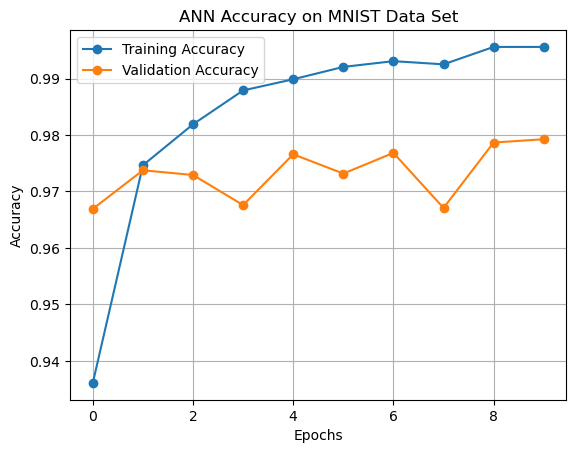

In [9]:
# Visualize training and validation accuracy
plt.figure()
plt.plot(history.history["accuracy"], marker="o", label="Training Accuracy")
plt.plot(history.history["val_accuracy"], marker="o", label="Validation Accuracy")
plt.title("ANN Accuracy on MNIST Data Set")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

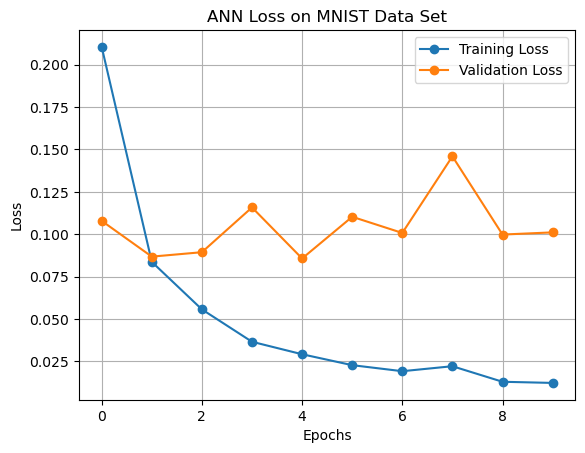

In [10]:
# Visualize training and validation loss
plt.figure()
plt.plot(history.history["loss"], marker="o", label="Training Loss")
plt.plot(history.history["val_loss"], marker="o", label="Validation Loss")
plt.title("ANN Loss on MNIST Data Set")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Save the final model
model.save("final_mnist_ann_model.keras")

# Load the saved model
loaded_model = load_model("final_mnist_ann_model.keras")

# Evaluate the loaded model on the test set
test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss:.3f}, Test accuracy: {test_acc:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.9757 - loss: 0.0843
Test loss: 0.077, Test accuracy: 0.978
